In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
TOKEN_SPAM_PROB='../jupyter/environment/SpamData/04/prob-spam.txt'
TOKEN_HAM_PROB='../jupyter/environment/SpamData/04/prob-nonspam.txt'
TOKEN_TOTAL_PROB='../jupyter/environment/SpamData/04/prob-all-tokens.txt'
TEST_FEATURE_MATRIX='../jupyter/environment/SpamData/04/test-features.txt'
TEST_TARGET_FILE='../jupyter/environment/SpamData/04/test-target.txt'

VOCAB_SIZE=2500
PROB_SPAM=0.31

In [26]:
X_test=np.loadtxt(TEST_FEATURE_MATRIX,delimiter=' ')
y_test=np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
spam_probs=np.loadtxt(TOKEN_SPAM_PROB, delimiter=' ')
ham_probs=np.loadtxt(TOKEN_HAM_PROB, delimiter=' ')
total_probs=np.loadtxt(TOKEN_TOTAL_PROB, delimiter=' ')


In [27]:
X_test.shape

(1723, 2500)

In [28]:
spam_probs.shape

(2500,)

In [31]:
# prob_token_on_spam=np.dot(X_test,spam_probs)

In [33]:
np.log(prob_token_on_spam)

array([-3.14844074, -1.76235217, -1.72303308, ..., -2.88630262,
       -3.47378175, -3.54512617])

In [34]:
np.log(spam_probs)

array([ -4.70632085,  -5.32161816,  -4.98677062, ...,  -9.20111798,
        -8.70034269, -10.40509078])

In [42]:
joint_log_spam=np.dot(X_test,np.log(spam_probs)-np.log(total_probs))+np.log(PROB_SPAM)

In [43]:
joint_log_spam

array([  3.21129124,  13.37520467,  19.20154172, ..., -31.37902251,
        -4.79449793, -17.04030295])

In [44]:
joint_log_ham=np.dot(X_test,np.log(ham_probs)-np.log(total_probs))+np.log(1-PROB_SPAM)

In [49]:
joint_log_ham.shape

(1723,)

In [46]:
X_test.shape

(1723, 2500)

In [48]:
spam_probs.shape

(2500,)

In [52]:
preds=[]
for i in range(X_test.shape[0]):
    if joint_log_spam[i]>joint_log_ham[i]:
        preds.append(1)
    else:
        preds.append(0)

In [56]:
yHat=pd.DataFrame(preds,index=range(X_test.shape[0]))

In [59]:
yHat.rename({0:'preds'},axis=1,inplace=True)

In [60]:
yHat.index.name='doc_id'

In [62]:
yHat.preds.value_counts()

preds
0    1163
1     560
Name: count, dtype: int64

In [63]:
import sklearn

In [68]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [66]:
print(classification_report(y_test,yHat))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1135
         1.0       0.98      0.93      0.95       588

    accuracy                           0.97      1723
   macro avg       0.97      0.96      0.97      1723
weighted avg       0.97      0.97      0.97      1723



In [67]:
cm=confusion_matrix(y_test,yHat)

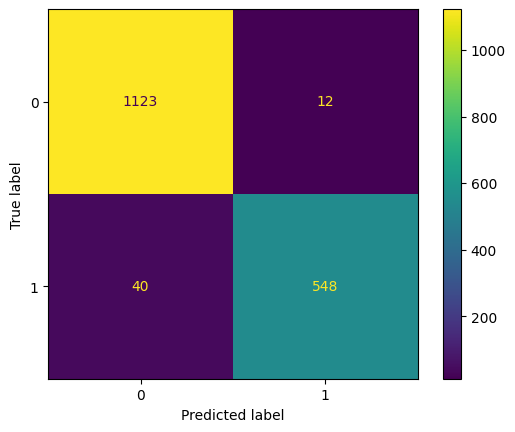

In [69]:
ConfusionMatrixDisplay(cm).plot()

In [89]:
yHat.drop('spam_prob',axis=1)

,preds
doc_id,
0,1
1,1
2,1
3,0
4,1
...,...
1718,0
1719,0
1720,0
